In [1]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *


Both Neuro and Mus: 2227
Only Neuro: 248
Only Mus: 794
Neither Neuro nor Mus: 694
Dropping 99
(878, 29)
Index(['recall a tick bite', 'length of time noticed tick bite',
       'treated with antibiotics', 'length of time treated for tick bite',
       'period of time for diagnosis', 'misdiagnosis', 'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia', 'Bio Sex', 'Antibiotics', 'Times Infected', 'GROC',
       'Bed Days', 'Mental Health Days', 'Physical Health Days', 'Disability',
       'general practitioner', 'infectious disease specialist', 'internist',
       'lyme specialist', 'other doctor', 'pediatrician', 'rheumatologist',
       'neuro', 'non_neuro'],
      dtype='object')


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


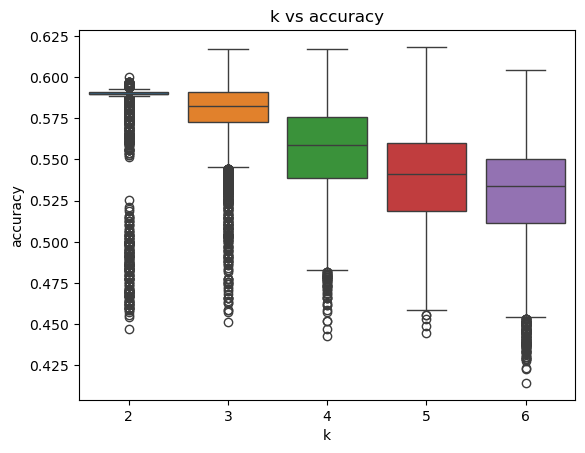

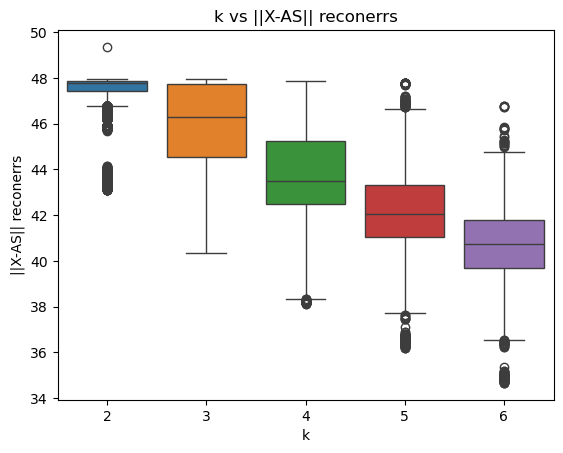

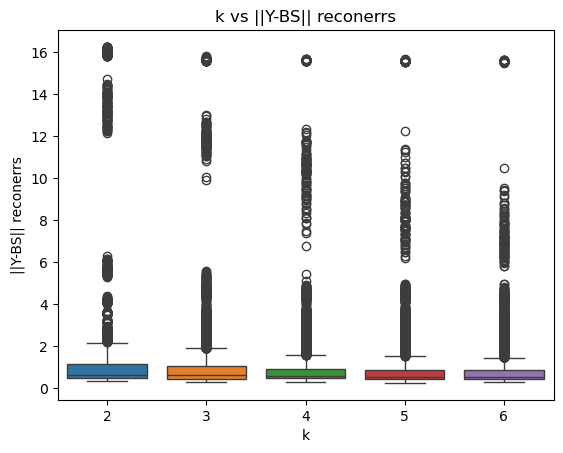

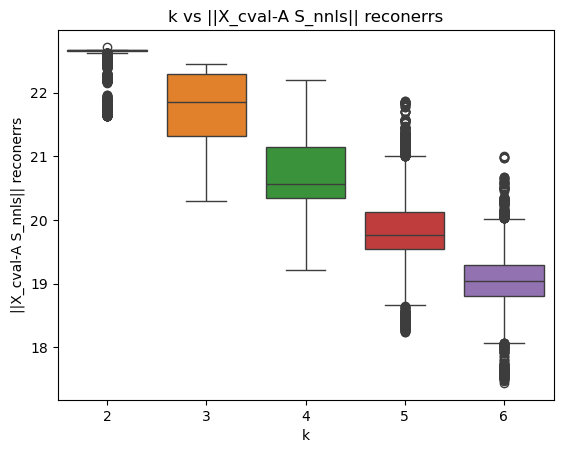

CNS1 Working Definition: Neuro vs Non-Neuro
best accuracy:  0.6182472137791286  best params:  {'k': 5, 'lambda': 62.62626262626263, 'random_state': 82}
test_accuracy:  0.5625
test_reconerr:  24.13297167884474


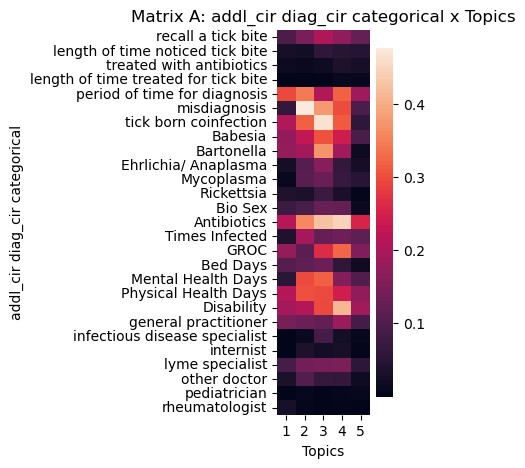

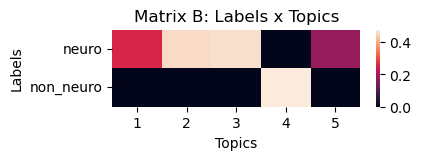

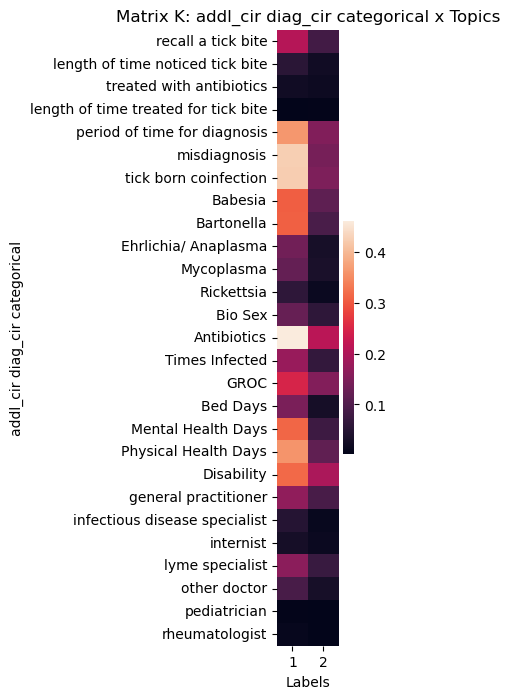

In [2]:
# CNS1 Defn
data = LymeData({CHRONIC, NEURO, NON_NEURO},{ADDL_CIR, DIAG_CIR, CATG},{NEURO, NON_NEURO}, defn=DEF_PNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, X_cvtst_reconerr_distr = ssnmf.gridsearch(param_range={'k': range(2,7),'lambda': list(np.linspace(0,100,100)), 'random_state': range(0,100)},
                                                          get_topic_accu_distr=True, get_reconerr_distr=True)
display_distr(accu_distr)
display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')
display_distr(X_cvtst_reconerr_distr, ylabel='||X_cval-A S_nnls|| reconerrs')

print('CNS1 Working Definition: Neuro vs Non-Neuro')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy, X_tst_reconerr = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)
print('test_reconerr: ', X_tst_reconerr)

names = ADDL_CIR + " "+ DIAG_CIR + " " + CATG
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)

# Total Neuro: 2569
# Total Non-Neuro: 1394

In [5]:
# Did not save properly. No such files.
accu_distr.to_csv('cns1_nvn_kva_lL.csv',index=False)
Xreconerr_distr.to_csv('cns1_nvn_kvX_lL.csv',index=False)
Yreconerr_distr.to_csv('cns1_nvn_kvY_lL.csv',index=False)
X_cvtst_reconerr_distr.to_csv('cns1_nvn_kvXcv_lL.csv',index=False)

In [7]:
print(accu_distr.mean())

2    0.587780
3    0.580329
4    0.555801
5    0.539437
6    0.529597
dtype: float64


In [8]:
print(Xreconerr_distr.mean())

2    47.511259
3    45.998425
4    43.845706
5    42.193797
6    40.637262
dtype: float64


In [9]:
print(Yreconerr_distr.mean())

2    1.249755
3    1.137091
4    1.075173
5    1.027185
6    0.992635
dtype: float64


In [10]:
print(X_cvtst_reconerr_distr.mean())

2    22.631688
3    21.802160
4    20.758169
5    19.873165
6    19.057090
dtype: float64
